In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 
from sklearn import svm
from sklearn.metrics import accuracy_score



In [25]:
#loading data
car_data = pd.read_csv("car data.csv")
car_data 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
car_data.head()
car_data.shape

(301, 9)

In [5]:
car_data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [6]:
#check the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking distribution of categorical dat
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [14]:
#encoding the data by converting text data to numerical values
# encoding fuel type
car_data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}},inplace=True)
# #encoding seller
car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}},inplace=True)
# #encoding transmission
car_data.replace({'Transmission':{'Manual': 0, 'Automatic': 1}},inplace=True)
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [19]:
#Splitting the data
X = car_data.drop(['Car_Name','Selling_Price' ], axis=1)
y = car_data['Selling_Price']
print(y)
X

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1,random_state=2)  
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


In [28]:
#model training
#linear regression
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
#evaluating the model
training_data_pred = reg_model.predict(X_train)

In [32]:
error_score = metrics.r2_score(y_train, training_data_pred)
print(error_score)

0.8799451660493703


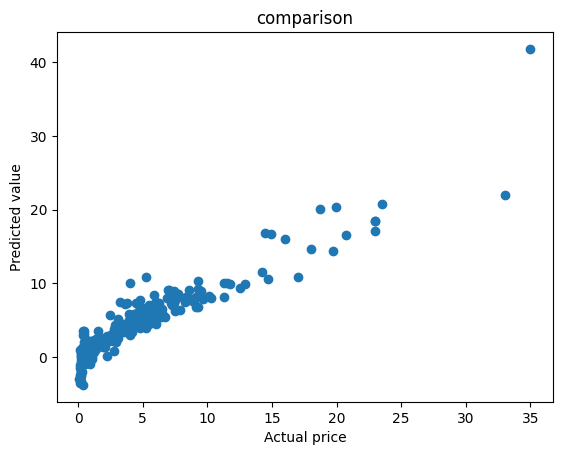

In [33]:
#visualizing the data
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("comparison")
plt.show()

In [34]:
#evaluating the model
testing_data_pred = reg_model.predict(X_test)

In [35]:
error_score = metrics.r2_score(y_test, testing_data_pred)
print(error_score)

0.8365766715024694


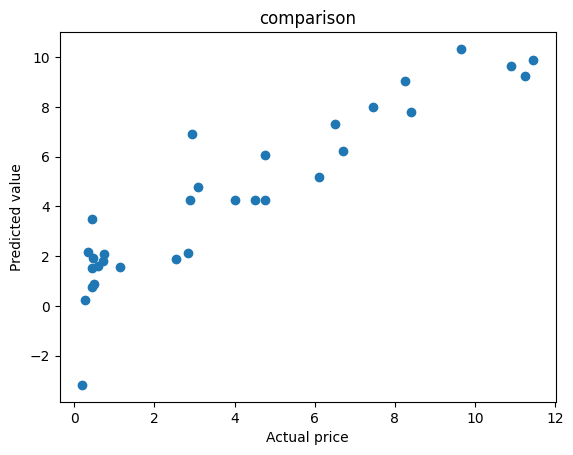

In [36]:
#visualizing the data
plt.scatter(y_test, testing_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("comparison")
plt.show()

In [37]:
#model training
#lasso regression
lasso_reg_model = Lasso()

lasso_reg_model.fit(X_train, y_train)

Lasso()

In [38]:
#evaluating the model
training_data_pred = lasso_reg_model.predict(X_train)

In [39]:
error_score = metrics.r2_score(y_train, training_data_pred)
print(error_score)

0.8427856123435795


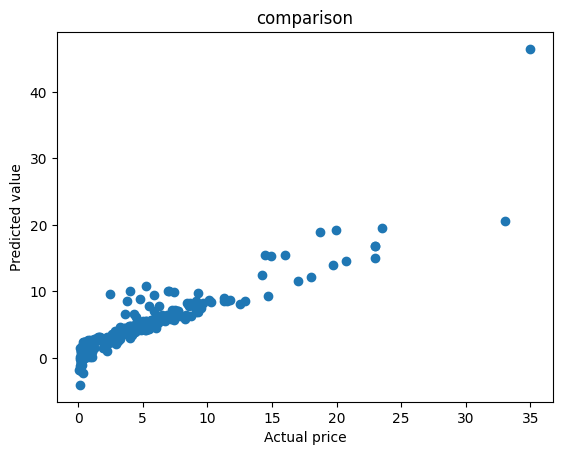

In [41]:
#visualizing the data
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("comparison")
plt.show()

In [42]:
#evaluating the model
testing_data_pred = lasso_reg_model.predict(X_test)

In [43]:
error_score = metrics.r2_score(y_test, testing_data_pred)
print(error_score)

0.8709167941173195


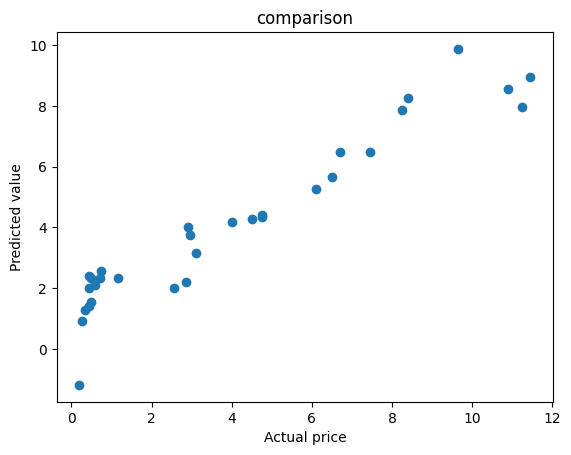

In [44]:
#visualizing the data
plt.scatter(y_test, testing_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("comparison")
plt.show()

In [45]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [46]:
std_data = scaler.transform(X)
std_data

array([[ 0.128897  , -0.23621461, -0.25622446, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [-0.21751369,  0.22150462,  0.1559105 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.25742689, -0.77396901, ..., -0.73728539,
        -0.39148015, -0.17450057],
       ...,
       [-1.60315648,  0.39068691,  1.31334003, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.56450434, -0.7198763 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 0.8217184 , -0.20029235, -0.81095812, ..., -0.73728539,
        -0.39148015, -0.17450057]])

In [47]:
X = std_data
X
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64
